## Testing contrack for tanoms

In [2]:
####

In [7]:
###if contrack is not installed run
#%pip install contrack

In [6]:
###== load contrack
#from contrack import contrack
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
#import xrft # mamba install xrft
from scipy import fft
#import flox # mamba install flox
import warnings
import matplotlib.pyplot as plt
from dask.distributed import Client
from typing import Tuple
COMPUTE_KWARGS = {
    "processes": True,
    "threads_per_worker": 1,
    "n_workers": 6,
    "memory_limit": "4GiB", # per worker, careful with this on climcal
}

In [3]:
### some data with var "anom", daily?
#xr_in=xr.open_dataset('/scratch/b/b382006/nextgems/cycle3/IFS_4.4-FESOM_5/z500/z500_ifs_c3_test_1D.nc')


In [4]:
### intitate
#temp = contrack()
#temp.read_xarray(data)


In [5]:
#temp.set_up(force=True)
#temp.ds=temp.ds.compute()

In [6]:
###=== rename zg
#temp=temp.rename({'t':'anom'})

In [7]:
# Finally, track blocking anticyclones (>=5oC, 50% overlap twosided, 5 timesteps persistence (here 5 days))
#temp.run_contrack(variable='anom',
#                   threshold=5,
#                   gorl='>=',
#                   overlap=0.5,
#                   persistence=5,
#                   twosided=True)

In [8]:
#temp_df = temp.run_lifecycle(flag='flag', variable='anom')
#temp_df.to_csv(outpath, index=False)

In [9]:
### make daily 6-hourly data

In [10]:
#blocks=xr.open_mfdataset('/scratch2/edolores/blocks/ANO_VAPV/BLOCKS*nc')
blocks=xr.open_mfdataset('/scratch2/edolores/blocks/ANO_VAPV/BLOCKS-era5-ano_1950-1958.nc')

In [11]:
blocks

<xarray.Dataset> Size: 3GB
Dimensions:    (longitude: 360, latitude: 181, time: 13148)
Coordinates:
  * longitude  (longitude) float32 1kB -180.0 -179.0 -178.0 ... 178.0 179.0
  * latitude   (latitude) float32 724B 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * time       (time) datetime64[ns] 105kB 1950-01-01 1950-01-01 ... 1958-12-31
Data variables:
    flag       (time, latitude, longitude) int32 3GB dask.array<chunksize=(1, 181, 360), meta=np.ndarray>

In [14]:
blocks_bin = xr.where(blocks['flag']>1,1,0)
blocks_bin

<xarray.DataArray 'flag' (time: 13148, latitude: 181, longitude: 360)> Size: 7GB
dask.array<where, shape=(13148, 181, 360), dtype=int64, chunksize=(1, 181, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 1kB -180.0 -179.0 -178.0 ... 178.0 179.0
  * latitude   (latitude) float32 724B 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * time       (time) datetime64[ns] 105kB 1950-01-01 1950-01-01 ... 1958-12-31

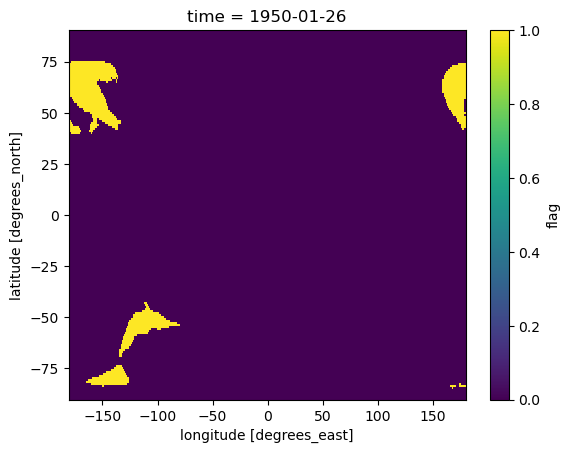

In [15]:
blocks_bin.isel(time=100).plot()

In [16]:
blocks_day = blocks_bin.resample(time='1D').mean(dim='time',keep_attrs=True)

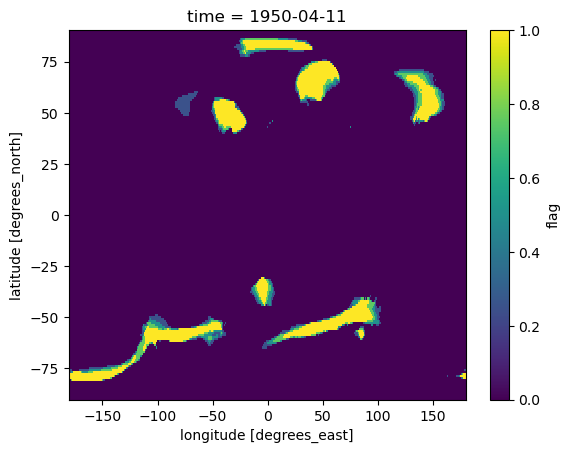

In [17]:
blocks_day.isel(time=100).plot()

In [18]:
blocks_day.to_netcdf('/scratch2/edolores/blocks/ANO_VAPV/BLOCKS-era5-ano_1950-1958_daily.nc')